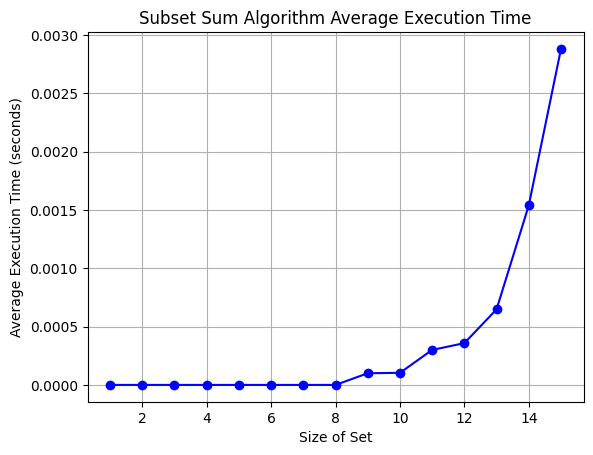

In [3]:
import time
import matplotlib.pyplot as plt
import random

def print_subset_sum(i, n, _set, target_sum, subset):
    global flag
    if target_sum == 0:
        flag = True
        return
    if i == n:
        return
    print_subset_sum(i + 1, n, _set, target_sum, subset)
    if _set[i] <= target_sum:
        subset.append(_set[i])
        print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)
        subset.pop()

def generate_set(n):
    return random.sample(range(1, 100), n)

def measure_execution_time(max_set_size, iterations):
    average_times = []
    set_sizes = list(range(1, max_set_size + 1))
    for set_size in set_sizes:
        total_time = 0
        for _ in range(iterations):
            _set = generate_set(set_size)
            target_sum = sum(_set) // 2
            subset = []
            start_time = time.time()
            print_subset_sum(0, set_size, _set, target_sum, subset)
            total_time += time.time() - start_time
            global flag
            flag = False
        average_times.append(total_time / iterations)
    return set_sizes, average_times

def plot_execution_time(max_set_size, iterations):
    set_sizes, average_times = measure_execution_time(max_set_size, iterations)
    plt.plot(set_sizes, average_times, marker='o', linestyle='-', color='b')
    plt.xlabel('Size of Set')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Subset Sum Algorithm Average Execution Time')
    plt.grid(True)
    plt.show()

#15 elements, averaging over 10 iterations each to get an average time
plot_execution_time(15, 10)